In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving input.csv to input.csv


In [ ]:
df = pd.read_csv('input.csv')
data = df.values

Identification ####################################################################################################################

In [ ]:
x_id_train = data[0:9000,0:12]
y_id_train = data[0:9000,12:15]
x_id_test = data[9000:9700,0:12]
y_id_test = data[9000:9700,12:15]

In [ ]:
y_id_train[:2]

array([[7.00000000e-02, 8.59070859e-02, 1.04955357e-04],
       [1.20000000e-01, 1.52066966e-01, 3.18488776e-04]])

In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(3, activation= tf.keras.activations.linear)
    ])
model.compile(optimizer= tf.keras.optimizers.Adam(lr =0.001),loss='mean_squared_error',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
r = model.fit(x_id_train, y_id_train, epochs= 1000)

Epoch 1/1000
282/282 [==============================] - 2s 3ms/step - loss: 90.9992 - accuracy: 0.7323
Epoch 2/1000
282/282 [==============================] - 1s 3ms/step - loss: 8.1453 - accuracy: 0.7503
Epoch 3/1000
282/282 [==============================] - 1s 3ms/step - loss: 0.5820 - accuracy: 0.8500
Epoch 4/1000
282/282 [==============================] - 1s 3ms/step - loss: 0.4827 - accuracy: 0.8511
Epoch 5/1000
282/282 [==============================] - 1s 3ms/step - loss: 0.2740 - accuracy: 0.8866
Epoch 6/1000
282/282 [==============================] - 1s 3ms/step - loss: 0.2034 - accuracy: 0.8949
Epoch 7/1000
282/282 [==============================] - 1s 3ms/step - loss: 0.1842 - accuracy: 0.9051
Epoch 8/1000
282/282 [==============================] - 1s 3ms/step - loss: 0.1601 - accuracy: 0.9180
Epoch 9/1000
282/282 [==============================] - 1s 3ms/step - loss: 0.2946 - accuracy: 0.8901
Epoch 10/1000
282/282 [==============================] - 1s 3ms/step - loss: 0.38

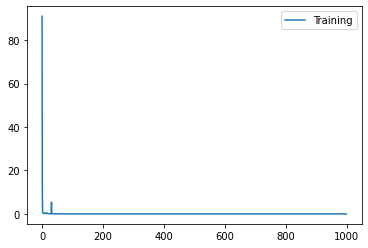

In [ ]:
plt.plot(r.history['loss'],label = 'Training')
plt.legend()
plt.show()

In [ ]:
y_id_pred = model.predict(x_id_test)

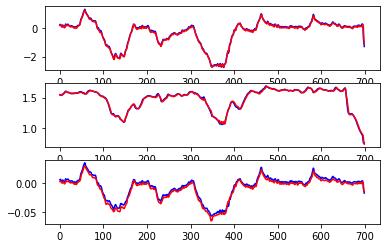

In [ ]:
x_label = np.arange(0,700,1)
plt.figure()
plt.subplot(311)
plt.plot(x_label, y_id_test[:,0], '-b', x_label, y_id_pred[:,0], '-r')
plt.subplot(312)
plt.plot(x_label, y_id_test[:,1], '-b', x_label, y_id_pred[:,1], '-r')
plt.subplot(313)
plt.plot(x_label, y_id_test[:,2], '-b', x_label, y_id_pred[:,2], '-r')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 68,099
Trainable params: 68,099
Non-traina

In [ ]:
model.save('id/my_model') 

INFO:tensorflow:Assets written to: id/my_model/assets


Inverse #########################################################################################################################

In [ ]:
x_inv_train = data[0:9000,2:15]
y_inv_train = data[0:9000,0:2]
x_inv_test = data[9000:9700,2:15]
y_inv_test = data[9000:9700,0:2]

In [ ]:
x_inv_train[:2]

array([[1.58400000e+03, 1.58400000e+03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.00000000e-02,
        3.50808552e-02, 1.83682945e-05, 7.00000000e-02, 8.59070859e-02,
        1.04955357e-04],
       [1.58400000e+03, 1.58400000e+03, 1.58400000e+03, 1.58400000e+03,
        3.00000000e-02, 3.50808552e-02, 1.83682945e-05, 7.00000000e-02,
        8.59070859e-02, 1.04955357e-04, 1.20000000e-01, 1.52066966e-01,
        3.18488776e-04]])

In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(2, activation= tf.keras.activations.linear)
    ])
model.compile(optimizer= tf.keras.optimizers.Adam(lr =0.001),loss='mean_squared_error',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
r = model.fit(x_inv_train, y_inv_train, epochs= 1000)

Epoch 1/1000
282/282 [==============================] - 1s 3ms/step - loss: 37039.3555 - accuracy: 0.4447
Epoch 2/1000
282/282 [==============================] - 1s 3ms/step - loss: 155.7892 - accuracy: 0.6141
Epoch 3/1000
282/282 [==============================] - 1s 3ms/step - loss: 75.3846 - accuracy: 0.6161
Epoch 4/1000
282/282 [==============================] - 1s 3ms/step - loss: 86.7462 - accuracy: 0.6282
Epoch 5/1000
282/282 [==============================] - 1s 3ms/step - loss: 112.0206 - accuracy: 0.6288
Epoch 6/1000
282/282 [==============================] - 1s 3ms/step - loss: 75.8204 - accuracy: 0.6280
Epoch 7/1000
282/282 [==============================] - 1s 3ms/step - loss: 75.7967 - accuracy: 0.6192
Epoch 8/1000
282/282 [==============================] - 1s 3ms/step - loss: 77.3526 - accuracy: 0.6237
Epoch 9/1000
282/282 [==============================] - 1s 3ms/step - loss: 73.4336 - accuracy: 0.6288
Epoch 10/1000
282/282 [==============================] - 1s 3ms/step

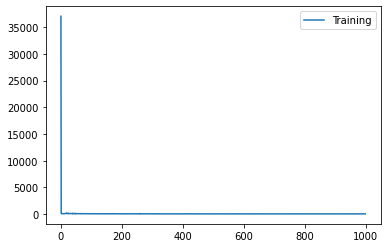

In [ ]:
plt.plot(r.history['loss'],label = 'Training')
plt.legend()
plt.show()

In [ ]:
y_inv_pred = model.predict(x_inv_test)

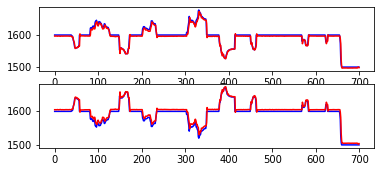

In [ ]:
x_label = np.arange(0,700,1)
plt.figure()
plt.subplot(311)
plt.plot(x_label, y_inv_test[:,0], '-b', x_label, y_inv_pred[:,0], '-r')
plt.subplot(312)
plt.plot(x_label, y_inv_test[:,1], '-b', x_label, y_inv_pred[:,1], '-r')
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1792      
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 2)                 258       
                                                                 
Total params: 68,098
Trainable params: 68,098
Non-trai

In [ ]:
model.save('inv/my_model') 

INFO:tensorflow:Assets written to: inv/my_model/assets


Running ###########################################################################################################################

In [ ]:
model_inverse = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(2, activation= tf.keras.activations.linear)
    ])
model_inverse.compile(optimizer= tf.keras.optimizers.Adam(lr =0.001),loss='mean_squared_error',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_inverse = tf.keras.models.load_model('inv/my_model')

In [ ]:
model_inverse.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1792      
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 2)                 258       
                                                                 
Total params: 68,098
Trainable params: 68,098
Non-trai

In [ ]:
model_identification = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(3, activation= tf.keras.activations.linear)
    ])
model_identification.compile(optimizer= tf.keras.optimizers.Adam(lr =0.001),loss='mean_squared_error',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_identification = tf.keras.models.load_model('id/my_model')

In [ ]:
model_identification.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 68,099
Trainable params: 68,099
Non-traina

In [ ]:
row = np.arange(0,700,1)

In [ ]:
row.shape

(700,)

In [ ]:
inv_input=np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],dtype=float);
id_input=np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],dtype=float);

In [ ]:
inv_pred = np.zeros([700, 2],dtype=float)
inv_output_11 = data[9000,2]
inv_output_12 = data[9000,3]
inv_output_21 = data[9000,4]
inv_output_22 = data[9000,5]

id_pred = np.zeros([700, 3],dtype=float)
id_output_11 = data[9000,9]
id_output_12 = data[9000,10]
id_output_13 = data[9000,11]
id_output_21 = data[9000,6]
id_output_22 = data[9000,7]
id_output_23 = data[9000,8]

inv_pred_11 = data[9000,2]
inv_pred_12 = data[9000,3]

inv_pred_21 = data[9000,4]
inv_pred_22 = data[9000,5]

In [ ]:
inv_output_11

1600.0

In [ ]:
  for i in row:
    inv_input[0,0] = inv_output_11
    inv_input[0,1] = inv_output_12
    inv_input[0,2] = inv_output_21
    inv_input[0,3] = inv_output_22
    inv_input[0,4] = data[i+9000,6]
    inv_input[0,5] = data[i+9000,7]
    inv_input[0,6] = data[i+9000,8]
    inv_input[0,7] = data[i+9000,9]
    inv_input[0,8] = data[i+9000,10]    
    inv_input[0,9] = data[i+9000,11]
    inv_input[0,10] = data[i+9000,12]
    inv_input[0,11] = data[i+9000,13]
    inv_input[0,12] = data[i+9000,14]

    inv_pred[i] = model_inverse.predict(inv_input)
    
    print(inv_input)
    inv_output_21 = inv_output_11
    inv_output_22 = inv_output_12
    inv_output_11 = inv_pred[i,0]
    inv_output_12 = inv_pred[i,1]

    id_input[0,0] = inv_pred[i,0]
    id_input[0,1] = inv_pred[i,1]
    id_input[0,2] = inv_pred_11
    id_input[0,3] = inv_pred_12
    id_input[0,4] = inv_pred_21
    id_input[0,5] = inv_pred_22
    id_input[0,6] = id_output_21
    id_input[0,7] = id_output_22
    id_input[0,8] = id_output_23  
    id_input[0,9] = id_output_11
    id_input[0,10] = id_output_12
    id_input[0,11] = id_output_13

    id_pred[i] = model_identification.predict(id_input)
    
    inv_pred_21 = inv_pred_11
    inv_pred_22 = inv_pred_12
    inv_pred_11 = inv_pred[i,0]
    inv_pred_12 = inv_pred[i,1]
    
    id_output_21 = id_output_11
    id_output_22 = id_output_12
    id_output_23 = id_output_13
    id_output_11= id_pred[i,0]
    id_output_12 = id_pred[i,1]
    id_output_13 = id_pred[i,2]
    print(id_input)

[[1.60000000e+03 1.60000000e+03 1.60000000e+03 1.60000000e+03
  2.70000000e-01 1.54506784e+00 7.28101458e-03 2.50000000e-01
  1.54675028e+00 6.74901409e-03 2.40000000e-01 1.54960341e+00
  6.49100153e-03]]
[[1.59670789e+03 1.60498755e+03 1.60000000e+03 1.60000000e+03
  1.60000000e+03 1.60000000e+03 2.70000000e-01 1.54506784e+00
  7.28101458e-03 2.50000000e-01 1.54675028e+00 6.74901409e-03]]
[[1.59670789e+03 1.60498755e+03 1.60000000e+03 1.60000000e+03
  2.50000000e-01 1.54675028e+00 6.74901409e-03 2.40000000e-01
  1.54960341e+00 6.49100153e-03 2.70000000e-01 1.54603583e+00
  7.28557616e-03]]
[[1.59318713e+03 1.61027588e+03 1.59670789e+03 1.60498755e+03
  1.60000000e+03 1.60000000e+03 2.50000000e-01 1.54675028e+00
  6.74901409e-03 1.94094241e-01 1.54509389e+00 3.40133253e-03]]
[[1.59318713e+03 1.61027588e+03 1.59670789e+03 1.60498755e+03
  2.40000000e-01 1.54960341e+00 6.49100153e-03 2.70000000e-01
  1.54603583e+00 7.28557616e-03 2.40000000e-01 1.53804051e+00
  6.44256669e-03]]
[[1.59056

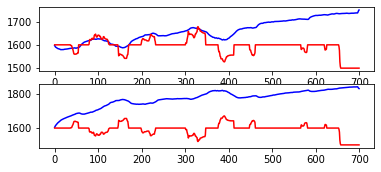

In [ ]:
x_label = np.arange(0,700,1)
plt.figure()
plt.subplot(311)
plt.plot(x_label, inv_pred[:,0], '-b', x_label, data[9002:9702,0], '-r')
plt.subplot(312)
plt.plot(x_label, inv_pred[:,1], '-b', x_label, data[9002:9702,1], '-r')
plt.show()

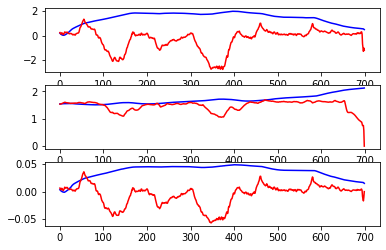

In [ ]:
x_label = np.arange(0,700,1)
plt.figure()
plt.subplot(311)
plt.plot(x_label, id_pred[:,0], '-b', x_label, data[9002:9702,12], '-r')
plt.subplot(312)
plt.plot(x_label, id_pred[:,1], '-b', x_label, data[9002:9702,13], '-r')
plt.subplot(313)
plt.plot(x_label, id_pred[:,2], '-b', x_label, data[9002:9702,14], '-r')
plt.show()

In [ ]:
err = np.arange(0,700,1)
error = np.zeros([700, 5],dtype=float)
for k in err:
    error[k,0] = abs(data[k+9000,0]-inv_pred[k,0])
    error[k,1] = abs(data[k+9000,1]-inv_pred[k,1])
    error[k,2] = abs(data[k+9000,12]-id_pred[k,0])
    error[k,3] = abs(data[k+9000,13]-id_pred[k,1])
    error[k,4] = abs(data[k+9000,14]-id_pred[k,2])

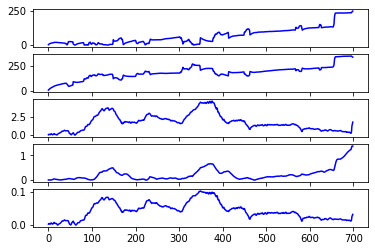

In [ ]:
x_label = np.arange(0,700,1)
plt.figure()
plt.subplot(511)
plt.plot(x_label, error[:,0], '-b')
plt.subplot(512)
plt.plot(x_label, error[:,1], '-b')
plt.subplot(513)
plt.plot(x_label, error[:,2], '-b')
plt.subplot(514)
plt.plot(x_label, error[:,3], '-b')
plt.subplot(515)
plt.plot(x_label, error[:,4], '-b')
plt.show()

In [ ]:
linear = np.linspace(error[0,:], error[699,:])

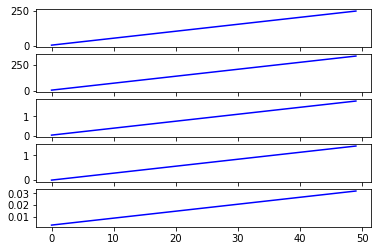

In [ ]:
x_label = np.arange(0,50,1)
plt.figure()
plt.subplot(511)
plt.plot(x_label, linear[:,0], '-b')
plt.subplot(512)
plt.plot(x_label, linear[:,1], '-b')
plt.subplot(513)
plt.plot(x_label, linear[:,2], '-b')
plt.subplot(514)
plt.plot(x_label, linear[:,3], '-b')
plt.subplot(515)
plt.plot(x_label, linear[:,4], '-b')
plt.show()